## Histogram 
- Görüntü histogramı, dijital görüntüdeki ton dağılımının grafiksel bir temsili olarak işlev gören bir histogram türüdür
- Her ton değeri için piksel sayısını içerir 
- Belirli bir görüntü için histograma bakılarak, ton dağılımı anlaşılabilir 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(371, 366, 3)


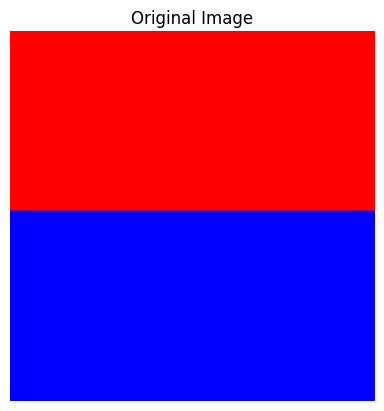

In [3]:
# Read image
img = cv2.imread("red_blue.jpg")
img_vis = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img_vis), plt.title("Original Image"), plt.axis("off")
print(img.shape)

toplam piksel sayısı = 371*366*3 = 407358

(256, 1)


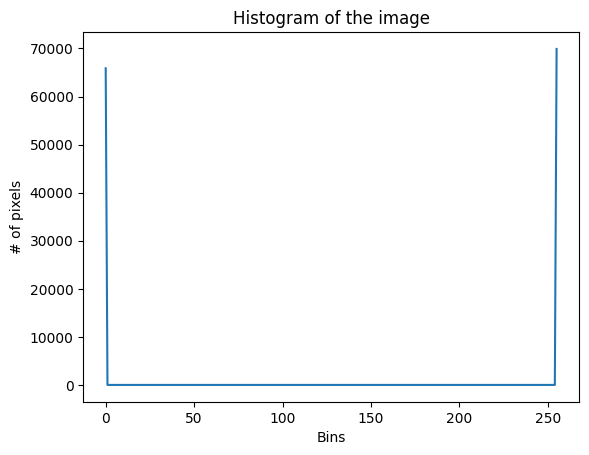

In [5]:
# Histogram of the image
img_hist = cv2.calcHist([img], channels = [0], mask = None, histSize = [256], ranges = [0, 256])
plt.figure(), plt.plot(img_hist), plt.title("Histogram of the image"), plt.xlabel("Bins"), plt.ylabel("# of pixels")
print(img_hist.shape)

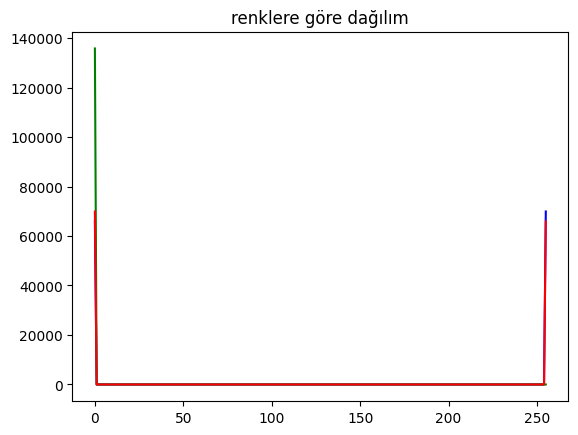

In [6]:

# histogram üzerinde renklerin dağılımını görme 
color = ("b", "g", "r")
plt.figure()
for i, c in enumerate(color):
    hist = cv2.calcHist([img], channels = [i], mask = None, histSize = [256], ranges = [0,256])
    plt.plot(hist, color = c),plt.title("renklere göre dağılım")

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Original Image'),
 (-0.5, 3263.5, 2447.5, -0.5))

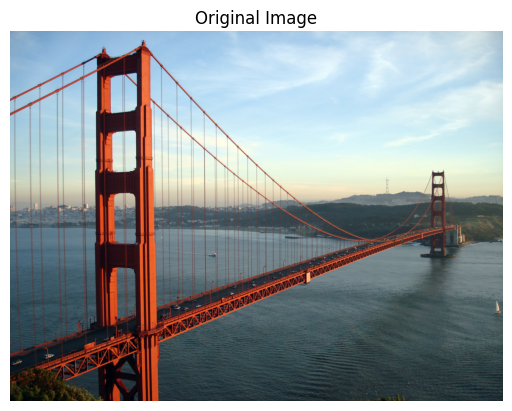

In [9]:
golden_gate = cv2.imread("goldenGate.jpg")
golden_gate_vis = cv2.cvtColor(golden_gate, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(golden_gate_vis), plt.title("Original Image"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Mask'),
 (-0.5, 3263.5, 2447.5, -0.5))

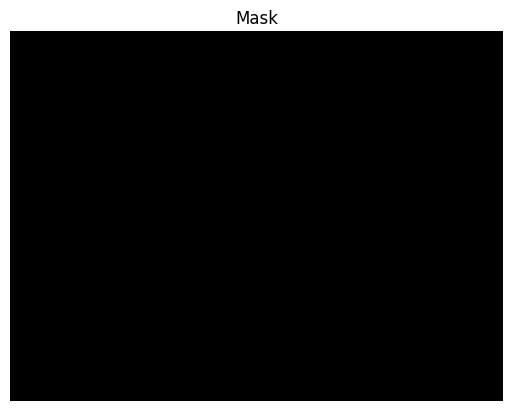

In [10]:
# Masking
mask = np.zeros(golden_gate.shape[:2], dtype = "uint8")
plt.figure(), plt.imshow(mask, cmap = "gray"), plt.title("Mask"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Mask'),
 (-0.5, 3263.5, 2447.5, -0.5))

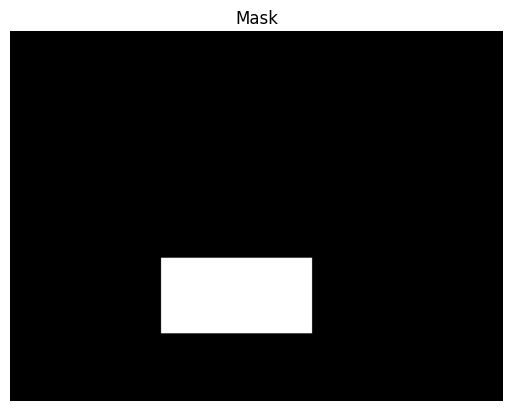

In [11]:
# Maske penceresi
mask[1500:2000, 1000:2000] = 255 
plt.figure(), plt.imshow(mask, cmap = "gray"), plt.title("Mask"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Masked Image'),
 (-0.5, 3263.5, 2447.5, -0.5))

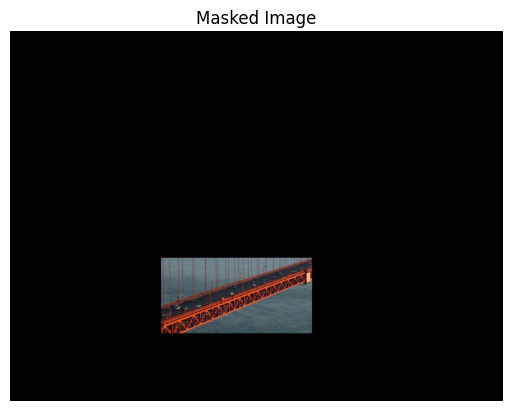

In [12]:
# Resime maskeyi uygulama
masked_img_vis = cv2.bitwise_and(golden_gate_vis, golden_gate_vis, mask = mask)
plt.figure(), plt.imshow(masked_img_vis), plt.title("Masked Image"), plt.axis("off")

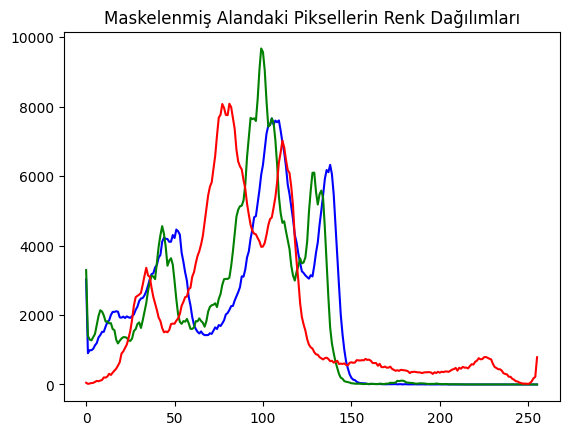

In [13]:
# Maskeyi histograma uygulama
masked_img = cv2.bitwise_and(golden_gate, golden_gate, mask = mask)
color = ("b", "g", "r")
plt.figure()

for i, c in enumerate(color):

    masked_img_hist = cv2.calcHist([golden_gate], channels = [i], mask = mask, histSize = [256], ranges = [0,256])
    plt.plot(masked_img_hist, color = c),plt.title("Maskelenmiş Alandaki Piksellerin Renk Dağılımları")

## Karşıtlık Arttırma 

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Original Image'),
 (-0.5, 1023.5, 682.5, -0.5))

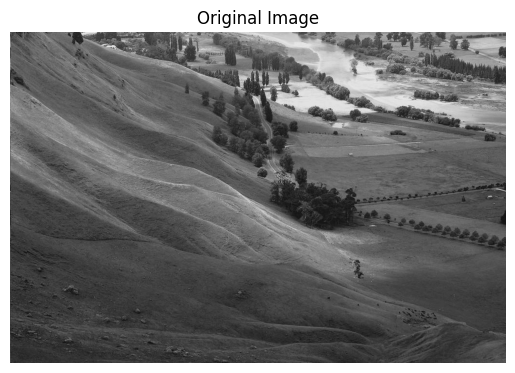

In [15]:
#orjinal resim
img = cv2.imread("hist_equ.jpg", 0)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.title("Original Image"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Orjinal Resmin Histogramı '))

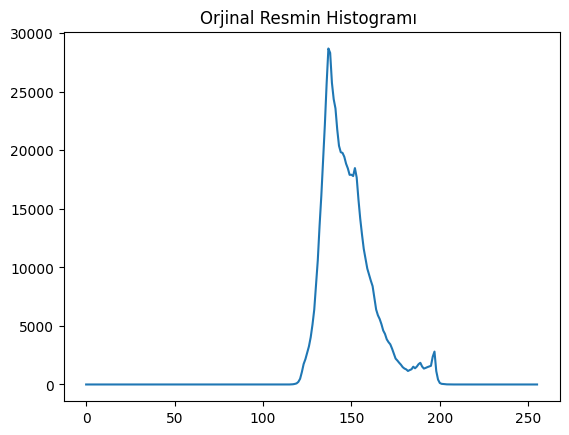

In [16]:
#orjinal resmin histogramı
img_hist = cv2.calcHist([img], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.figure(), plt.plot(img_hist), plt.title("Orjinal Resmin Histogramı ")

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Kontrast Arttırılmış Resim'),
 (-0.5, 1023.5, 682.5, -0.5))

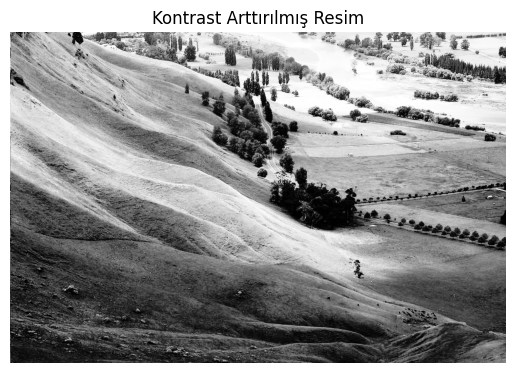

In [18]:
#Kontrast Arttırma
eq_hist = cv2.equalizeHist(img)
plt.figure(), plt.imshow(eq_hist, cmap = "gray"), plt.title("Kontrast Arttırılmış Resim"), plt.axis("off") 

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Kontrastı Arttırılmış Resmin Histogramı'))

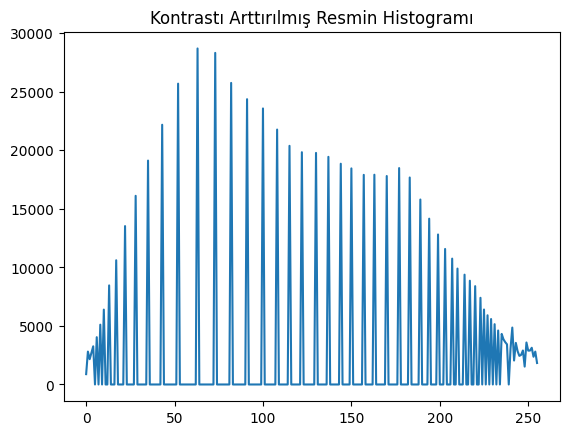

In [19]:
#Kontrastı Arttırılmış Resmin Histogramı
eq_img_hist = cv2.calcHist([eq_hist], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.figure(), plt.plot(eq_img_hist), plt.title("Kontrastı Arttırılmış Resmin Histogramı")